In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../mbspbs10pc')

from mbspbs10pc import utils

# Check MBS-PBS 10% data availability

In [3]:
ROOT = os.path.join('..','..','..','data')

mbs_files = filter(lambda x: x.startswith('MBS'), os.listdir(ROOT))
pbs_files = filter(lambda x: x.startswith('PBS'), os.listdir(ROOT))
sample_pin_lookout = filter(lambda x: x.startswith('SAMPLE'), os.listdir(ROOT))[0]

print('MBS files:')
for mbs in mbs_files:
    print('{}'.format(os.path.join(ROOT, mbs)))
    
print('PBS files:')
for pbs in pbs_files:
    print('{}'.format(os.path.join(ROOT, pbs)))
    
print('Sample PIN lookout: {}'.format(os.path.join(ROOT, sample_pin_lookout)))

MBS files:
../../../data/MBS_SAMPLE_10PCT_2013.csv
../../../data/MBS_SAMPLE_10PCT_2012.csv
../../../data/MBS_SAMPLE_10PCT_2010.csv
../../../data/MBS_SAMPLE_10PCT_2011.csv
../../../data/MBS_SAMPLE_10PCT_2014.csv
../../../data/MBS_SAMPLE_10PCT_2008.csv
../../../data/MBS_SAMPLE_10PCT_2009.csv
PBS files:
../../../data/PBS_SAMPLE_10PCT_2012.csv
../../../data/PBS_SAMPLE_10PCT_2013.csv
../../../data/PBS_SAMPLE_10PCT_2011.csv
../../../data/PBS_SAMPLE_10PCT_2010.csv
../../../data/PBS_SAMPLE_10PCT_2009.csv
../../../data/PBS_SAMPLE_10PCT_2008.csv
Sample PIN lookout: ../../../data/SAMPLE_PIN_LOOKUP.csv


In [75]:
'PBS_SAMPLE_10PCT_2008.csv'.split('_')[-1].split('.')[0]

'2008'

# PBS take a look

In [4]:
filename = pbs_files[0]
df = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0, index_col=0, nrows=1000)
df.shape

(1000, 13)

In [5]:
df.head()

,SPPLY_DT,ITM_CD,PBS_RGLTN24_ADJST_QTY,BNFT_AMT,PTNT_CNTRBTN_AMT,SRT_RPT_IND,RGLTN24_IND,DRG_TYP_CD,MJR_SPCLTY_GRP_CD,UNDR_CPRSCRPTN_TYP_CD,PRSCRPTN_CNT,PTNT_CTGRY_DRVD_CD,PTNT_STATE
PTNT_ID,,,,,,,,,,,,,
4599420094,11DEC2012,02236Q,30,0.00,16.01,R,N,GE,1.0,U,1,G2,VIC
5850597601,26NOV2012,08386J,56,72.91,0.00,R,N,GE,1.0,NaN,1,C0,NSW
1237668038,25FEB2012,08214H,30,22.60,35.40,R,N,GE,1.0,NaN,1,G2,VIC
4493310342,18JAN2012,02055E,120,18.92,5.80,R,N,GE,1.0,NaN,1,C1,VIC
2902208774,26DEC2012,02751T,30,11.56,0.00,NaN,N,GE,1.0,NaN,1,C0,SA


# Drugs used in diabetes

In [52]:
_dd = pd.read_csv(os.path.join('..', 'data', 'drugs_used_in_diabetes.csv'), header=0)

# Fix 6-digit notation
dd = set()
for item in _dd.values.ravel():
    if len(item)<6:
        dd.add(str(0)+item)
    else:
        dd.add(item)

# FIXME - exclude Metformins and Sulfonamides
dd = pd.DataFrame(data=list(dd), columns=_dd.columns)
ms = pd.read_csv(os.path.join('..', 'data', 'metformins_sulfonamides.csv'), header=0)
mask = []
for d in dd.values:
    mask.append(d not in ms.values)
dd = pd.DataFrame(data=dd.values[mask], columns=dd.columns)
print(dd.shape)

(76, 1)


In [53]:
dd.head()

,ITM_CD
0,09061X
1,09180E
2,10649L
3,01763T
4,09449H


In [60]:
dd_set = set(list(dd.values.ravel()))

# Filter diabetes

In [7]:
filename = 'PBS_SAMPLE_10PCT_2012.csv'
costs = pd.read_csv(os.path.join(ROOT, '{}'.format(filename)), header=0,
                    usecols=['BNFT_AMT', 'PTNT_CNTRBTN_AMT', 'ITM_CD', 'SPPLY_DT'])
costs.head()

,SPPLY_DT,ITM_CD,BNFT_AMT,PTNT_CNTRBTN_AMT
0,11DEC2012,02236Q,0.00,16.01
1,26NOV2012,08386J,72.91,0.00
2,25FEB2012,08214H,22.60,35.40
3,18JAN2012,02055E,18.92,5.80
4,26DEC2012,02751T,11.56,0.00


In [81]:
costs[np.logical_and(costs['PTNT_CNTRBTN_AMT'] > 35.4, costs['ITM_CD'].isin(dd_set))]

,SPPLY_DT,ITM_CD,BNFT_AMT,PTNT_CNTRBTN_AMT
34639,27DEC2012,01761Q,188.32,36.1
36811,28SEP2012,09039R,788.32,70.8
39797,23JUN2012,03387G,335.22,212.4
59078,19DEC2012,03387G,60.61,36.1
84248,31DEC2012,05476F,63.38,36.1
94463,25DEC2012,01531N,97.82,36.1
124178,27DEC2012,09450J,59.29,36.1
128137,25DEC2012,05475E,62.56,36.1
130482,26DEC2012,03387G,60.61,36.1
149324,24DEC2012,09039R,396.72,36.1


0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
23473509    False
23473510    False
23473511    False
23473512    False
23473513    False
23473514    False
23473515    False
23473516    False
23473517    False
23473518    False
23473519    False
23473520    False
23473521    False
23473522    False
23473523    False
23473524    False
23473525    False
23473526    False
23473527    False
23473528    False
23473529    False
23473530    False
23473531    False
23473532    False
23473533  

In [64]:
dd_costs = costs.loc[costs['ITM_CD'].isin(dd_set)]
print(dd_costs.shape)

(252788, 4)


In [76]:
dd_costs.head()

,SPPLY_DT,ITM_CD,BNFT_AMT,PTNT_CNTRBTN_AMT
144,22FEB2012,01763T,188.92,35.4
163,15JUN2012,05476F,567.90,0.0
521,01JAN2012,03423E,170.59,5.8
557,30APR2012,09451K,90.83,5.8
568,18JAN2012,08695P,42.22,35.4


# Costs plot

In [39]:
#idx = np.where(np.logical_and(costs['PTNT_CNTRBTN_AMT'].values > 0, costs['PTNT_CNTRBTN_AMT'].values < 50))

In [71]:
xx = dd_costs['BNFT_AMT']

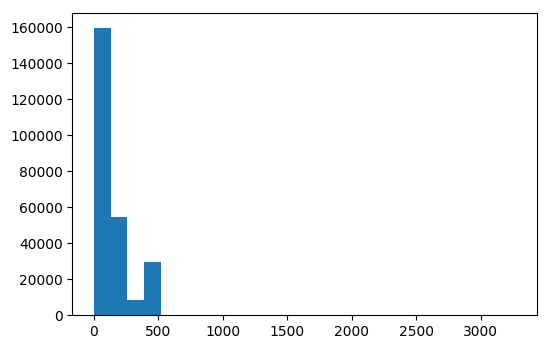

In [72]:
plt.figure(dpi=100)
plt.hist(xx, bins=25);

# Summary plots

In [ ]:
import cPickle as pkl

with open('../tmp/df2.pkl','rb') as f:
    dfy = pkl.load(f)

In [ ]:
plt.figure(dpi=100)
lengths = [len(dfy['PBS_SAMPLE_10PCT_'+str(k)+'.csv']) for k in np.arange(2008,2014)]
plt.plot(np.arange(2008,2014), lengths, '-o')
plt.ylabel('#people using drugs for diabetes')
plt.ylim([0, 50000])
plt.savefig('../tmp/people_using_dd.png');

In [ ]:
starting = []
for target_year in np.arange(2009, 2014):
    # From the target year, go backward and find the subjects
    # that were prescribed with diabete control drugs for the
    # first time
    positive_subjects = set(dfy['PBS_SAMPLE_10PCT_'+str(target_year)+'.csv'])

    for year in np.arange(2008, target_year)[::-1]:
        curr = set(dfy['PBS_SAMPLE_10PCT_'+str(year)+'.csv'])
        positive_subjects = set(filter(lambda x: x not in curr, positive_subjects))
    starting.append(len(positive_subjects))

In [ ]:
plt.figure(dpi=100)
plt.bar(np.arange(len(starting)), starting)
plt.xticks(np.arange(len(starting)), np.arange(2009, 2014))
plt.ylabel('#people started using drugs for diabetes')
plt.title('Max value is: {} achieved in {}'.format(np.max(starting),
                                             np.arange(2009, 2014)[np.argmax(starting)]))
plt.savefig('../tmp/people_started_using_dd.png');